In [ ]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

from grad.nn import MLP

In [77]:
nn = MLP(1, [16, 16, 1])

In [78]:
xs = [i / 100 for i in range(-100, 100)]
ys = [i ** 2 for i in xs]

In [ ]:
iters = 100
step_size = 0.05

for k in range(iters):

    # forward pass
    ypred = [nn([x]) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) / len(xs)

    # zero grad
    for p in nn.parameters():
      p.grad = 0.0

    # backward pass
    loss.backward()

    #update
    learning_rate = 1.0 - 0.9*k/iters
    for p in nn.parameters():
      p.data += -step_size * learning_rate * p.grad

    print(k, loss.data)

0 0.8337254336145921
1 0.531433329397551
2 0.2995191487299855
3 0.19254269179159086
4 0.15543661391910818
5 0.12614156954320824
6 0.10087840629149869
7 0.08051392924289012
8 0.06518560263562465
9 0.05428573312421684
10 0.046832534535486706
11 0.04182540104160518
12 0.03844503364158829
13 0.03610242236570429
14 0.03440684633583585
15 0.03311156492280616
16 0.03206521181659104
17 0.031176375388515944
18 0.03039021894003784
19 0.029673849857504746
20 0.02900743186025071
21 0.028378873382378562
22 0.027780679456573792
23 0.027208092116291382
24 0.02665799211348187
25 0.026128249001869188
26 0.025617335213983683
27 0.025124095841543594
28 0.024647610528078037
29 0.02418711006985763
30 0.023741925660871376
31 0.023311457717708955
32 0.022895156515572213
33 0.022492509993491776
34 0.0221030359408922
35 0.021726276882042872
36 0.021361796635979716
37 0.021009177927182356
38 0.020668020662825488
39 0.02033794063870403
40 0.020018568525400834
41 0.019709549041315423
42 0.019410540253254754
43 0.

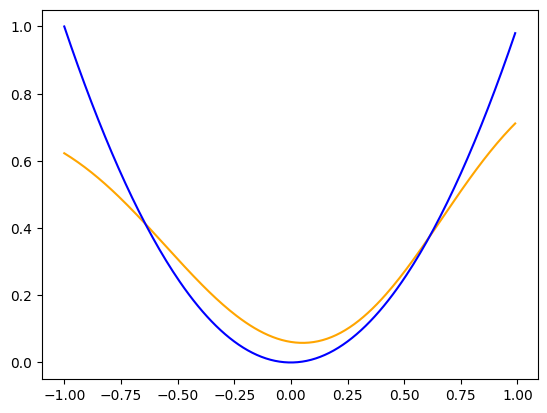

In [80]:
plt.plot(xs, [y.data for y in ypred], label='prediction', color='orange')
plt.plot(xs, ys, label='$x^2$', color='blue')